In [1]:
#import cs109style
#cs109style.customize_mpl()
#cs109style.customize_css()

# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt
import requests
from pattern import web



## Fetching population data from Wikipedia

In this example we will fetch data about countries and their population from Wikipedia.

http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population has several tables for individual countries, subcontinents as well as different years. We will combine the data for all countries and all years in a single panda dataframe and visualize the change in population for different countries.

###We will go through the following steps:
* fetching html with embedded data
* parsing html to extract the data
* collecting the data in a panda dataframe
* displaying the data

To give you some starting points for your homework, we will also show the different sub-steps that can be taken to reach the presented solution.

## Fetching the Wikipedia site

In [2]:
url = 'http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'
website_html = requests.get(url).text
#print website_html

## Parsing html data

In [16]:
def get_population_html_tables(html):
    """Parse html and return html tables of wikipedia population data."""

    dom = web.Element(html)

    ### 0. step: look at html source!
    
    #### 1. step: get all tables
    #tbls = [t for t in dom.by_tag('table')]
    tbls = dom.by_class('sortable wikitable')

    #### 2. step: get all tables we care about    
    #tbls = [t for t in dom.by_tag('table') if t.attributes.has_key('class') and t.attributes['class'] == 'sortable wikitable']

    return tbls

tables = get_population_html_tables(website_html)
print "table length: %d" %len(tables)
for t in tables:
    print t.attributes


table length: 6
{u'style': u'text-align: right', u'class': u'sortable wikitable'}
{u'style': u'text-align: right', u'class': u'sortable wikitable'}
{u'style': u'text-align: right', u'class': u'sortable wikitable'}
{u'style': u'text-align: right', u'class': u'sortable wikitable'}
{u'style': u'text-align: right', u'class': u'sortable wikitable'}
{u'style': u'text-align: right', u'class': u'sortable wikitable'}


In [12]:
def table_type(tbl):
    ### Extract the table type
    headers = [th.content for th in tbl.by_tag('th')]
    return headers[0]

# group the tables by type
tables_by_type = defaultdict(list)  # defaultdicts have a default value that is inserted when a new key is accessed
#print tables_by_type
for tbl in tables:
    #print table_type(tbl)
    #print tables_by_type[table_type(tbl)]
    tables_by_type[table_type(tbl)].append(tbl)
    #print tables_by_type

print tables_by_type

defaultdict(<type 'list'>, {u'Country or territory': [Element(tag=u'table'), Element(tag=u'table'), Element(tag=u'table')], u'(Sub)continent': [Element(tag=u'table'), Element(tag=u'table'), Element(tag=u'table')]})


## Extracting data and filling it into a dictionary

In [209]:
def get_countries_population(tables):
    """Extract population data for countries from all tables and store it in dictionary."""
    
    result = defaultdict(dict)

    # 1. step: try to extract data for a single table    

    # 2. step: iterate over all tables, extract headings and actual data and combine data into single dict
    for tbl in tables:
        tbl_headers = [th.content for th in tbl.by_tag('th')]
        #print tbl_headers
        column_idx_years = []
        for idx, header in enumerate(tbl_headers):
            if header.isnumeric():
                column_idx_years.append((idx, int(header)))
        
        #column_idx_years = [(idx, int(header)) for idx, header in enumerate(tbl_headers) if header.isnumeric()]
        #print column_idx_years
        column_idx, column_years = zip(*column_idx_years)
        #print column_idx
        #print column_years
        
        tbl_rows = [row for row in tbl.by_tag('tr') if row.by_tag('td')]
        
        #tbl_rows = []
        #for row in tbl.by_tag('tr'):
        #    if row.by_tag('td'):
        #        tbl_rows.append(row)
        #print len(tbl_rows)
        for row in tbl_rows:
            countryname = (row.by_tag('td')[0].by_tag('a')[0].content).encode('ascii','ignore')
            print type(countryname)
            countrydata = {column_years[i]:int(row.by_tag('td')[idx].content.replace(',', ''))/1000.0 for i, idx in enumerate(column_idx)}
            print countrydata
            print result[countryname]
            
            result[countryname].update(countrydata)
    
        
    return result


result = get_countries_population(tables_by_type['Country or territory'])
print result['China']

<type 'str'>
{1955: 8.891, 1960: 9.829, 1965: 10.998, 1970: 12.431, 1975: 14.132, 1980: 15.044, 1950: 8.15}
{}
<type 'str'>
{1955: 1.392, 1960: 1.623, 1965: 1.884, 1970: 2.157, 1975: 2.401, 1980: 2.671, 1950: 1.227}
{}
<type 'str'>
{1955: 9.842, 1960: 10.909, 1965: 11.963, 1970: 13.932, 1975: 16.14, 1980: 18.806, 1950: 8.893}
{}
<type 'str'>
{1955: 0.02, 1960: 0.02, 1965: 0.025, 1970: 0.027, 1975: 0.03, 1980: 0.032, 1950: 0.019}
{}
<type 'str'>
{1955: 0.006, 1960: 0.008, 1965: 0.014, 1970: 0.02, 1975: 0.027, 1980: 0.034, 1950: 0.006}
{}
<type 'str'>
{1955: 4.423, 1960: 4.797, 1965: 5.135, 1970: 5.606, 1975: 6.05, 1980: 7.206, 1950: 4.118}
{}
<type 'str'>
{1955: 0.005, 1960: 0.006, 1965: 0.006, 1970: 0.006, 1975: 0.006, 1980: 0.007, 1950: 0.005}
{}
<type 'str'>
{1955: 0.051, 1960: 0.055, 1965: 0.059, 1970: 0.066, 1975: 0.068, 1980: 0.069, 1950: 0.046}
{}
<type 'str'>
{1955: 18.928, 1960: 20.616, 1965: 22.283, 1970: 23.962, 1975: 26.082, 1980: 28.37, 1950: 17.15}
{}
<type 'str'>
{1955: 1

## Creating a dataframe from a dictionary

In [202]:
# create dataframe

df = pd.DataFrame.from_dict(result, orient='index')
#print df
# sort based on year
df.sort(axis=1,inplace=True)
#print df
help(df.sort)
#help(df.ix)


Help on method sort in module pandas.core.frame:

sort(self, columns=None, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last') method of pandas.core.frame.DataFrame instance
    Sort DataFrame either by labels (along either axis) or by the values in
    column(s)
    
    Parameters
    ----------
    columns : object
        Column name(s) in frame. Accepts a column name or a list
        for a nested sort. A tuple will be interpreted as the
        levels of a multi-index.
    ascending : boolean or list, default True
        Sort ascending vs. descending. Specify list for multiple sort
        orders
    axis : {0, 1}
        Sort index/rows versus columns
    inplace : boolean, default False
        Sort the DataFrame without creating a new instance
    kind : {'quicksort', 'mergesort', 'heapsort'}, optional
        This option is only applied when sorting on a single column or label.
    na_position : {'first', 'last'} (optional, default='last')
        'f

## Some data accessing functions for a panda dataframe

In [197]:
print df.columns

subtable = df.iloc[0:2, 0:4]
print "subtable"
print subtable
print ""

column = df[1955]
print "column"
print column
print ""

row = df.ix[0] #row 0
print "row"
print row
print ""

rows = df.ix[:2] #rows 0,1
print "rows"
print rows
print ""

element = df.ix[0,1955] #element
print "element"
print element
print ""

# max along column
print "max"
print df[1950].max()
print ""

# axes
print "axes"
print df.axes
print ""

row = df.ix[0]
print "row info"
print row.name
print row.index
print ""

countries =  df.index
print "countries"
print countries
print ""

print "Austria"
print df.ix['Austria']

Int64Index([1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050], dtype='int64')
subtable
              1950   1955   1960    1965
Afghanistan  8.150  8.891  9.829  10.998
Albania      1.227  1.392  1.623   1.884

column
Afghanistan             8.891
Albania                 1.392
Algeria                 9.842
American Samoa          0.020
Andorra                 0.006
Angola                  4.423
Anguilla                0.005
Antigua and Barbuda     0.051
Argentina              18.928
Armenia                 1.565
Aruba                   0.054
Australia               9.277
Austria                 6.947
Azerbaijan              3.314
Bahamas                 0.087
...
United Arab Emirates              0.083
United Kingdom                   50.946
United States                   165.069
United States Virgin Islands      0.028
Uruguay                           2.353
Uzbekistan                        7.232
Vanuatu     

## Plotting population of 4 countries

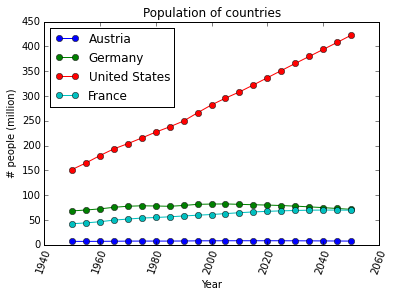

In [201]:
plotCountries = ['Austria', 'Germany', 'United States', 'France']
    
for country in plotCountries:
    row = df.ix[country]
    plt.plot(row.index, row, label=row.name, marker='o' ) 
    
plt.ylim(ymin=0) # start y axis at 0

plt.xticks(rotation=70)
plt.legend(loc='best')
plt.xlabel("Year")
plt.ylabel("# people (million)")
plt.title("Population of countries")

## Plot 5 most populous countries from 2010 and 2060

Afghanistan            29.121
Albania                 2.987
Algeria                34.586
American Samoa          0.066
Andorra                 0.085
Angola                 17.043
Anguilla                0.015
Antigua and Barbuda     0.087
Argentina              41.343
Armenia                 2.967
Aruba                   0.105
Australia              21.516
Austria                 8.214
Azerbaijan              9.302
Bahamas                 0.310
...
United Arab Emirates              4.976
United Kingdom                   62.348
United States                   308.282
United States Virgin Islands      0.110
Uruguay                           3.301
Uzbekistan                       27.866
Vanuatu                           0.222
Venezuela                        27.223
Vietnam                          89.571
Wallis and Futuna                 0.015
West Bank                         2.515
Western Sahara                    0.492
Yemen                            23.495
Zambia                    

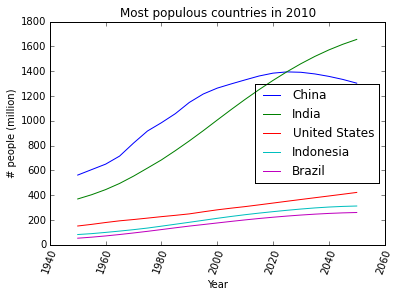

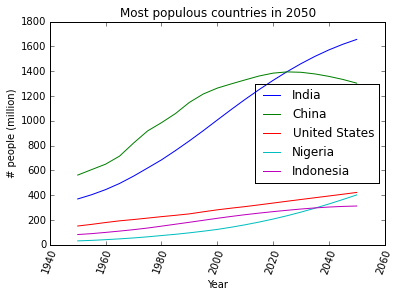

In [207]:
def plot_populous(df, year):
    # sort table depending on data value in year column
    df_by_year = df.sort(year, ascending=False)
    #print df_by_year
    
    plt.figure()
    for i in range(5):  
        row = df_by_year.ix[i]
        plt.plot(row.index, row, label=row.name ) 
            
    plt.ylim(ymin=0)
    
    plt.xticks(rotation=70)
    plt.legend(loc='best')
    plt.xlabel("Year")
    plt.ylabel("# people (million)")
    plt.title("Most populous countries in %d" % year)

print df[2010]
plot_populous(df, 2010)
plot_populous(df, 2050)